#Reading Data using Pandas

In [ ]:
# First, let's load the dataset to understand its structure and the types of data it contains.
import pandas as pd

# Load the dataset
data_path = 'sleep.csv'
sleep_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
sleep_data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


#EDA

#Validating Each Column

In [ ]:
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

#Exploratory Data Analysis on Sleep Disorder Factors

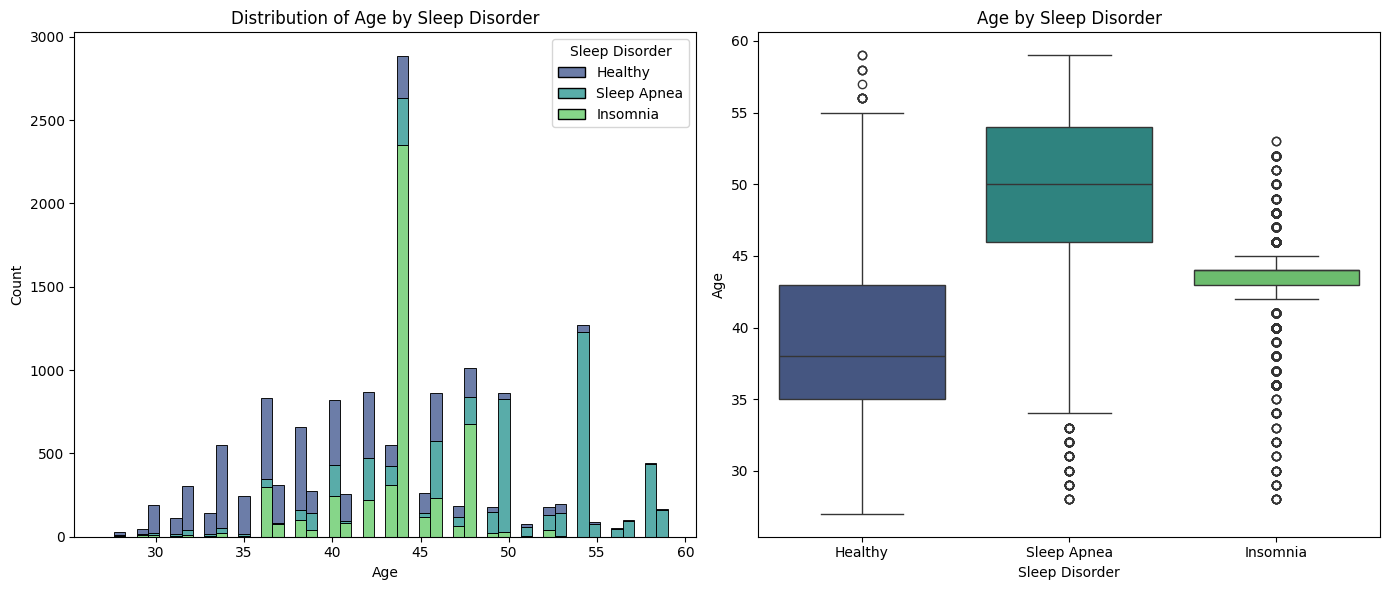

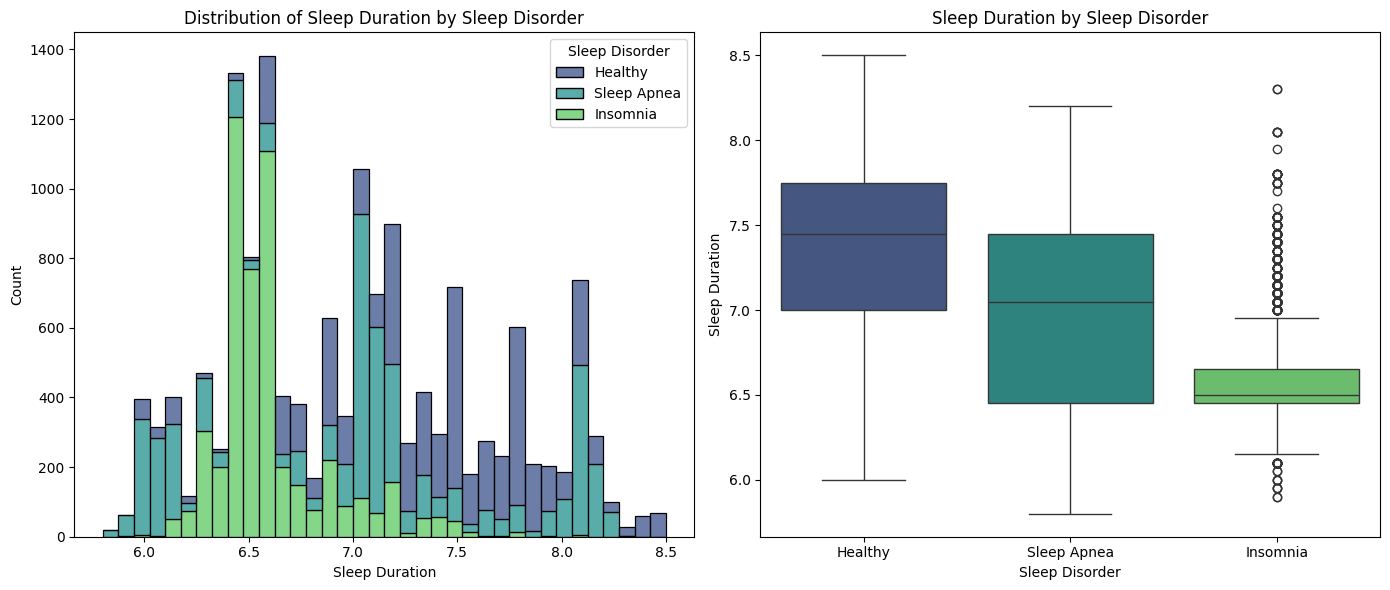

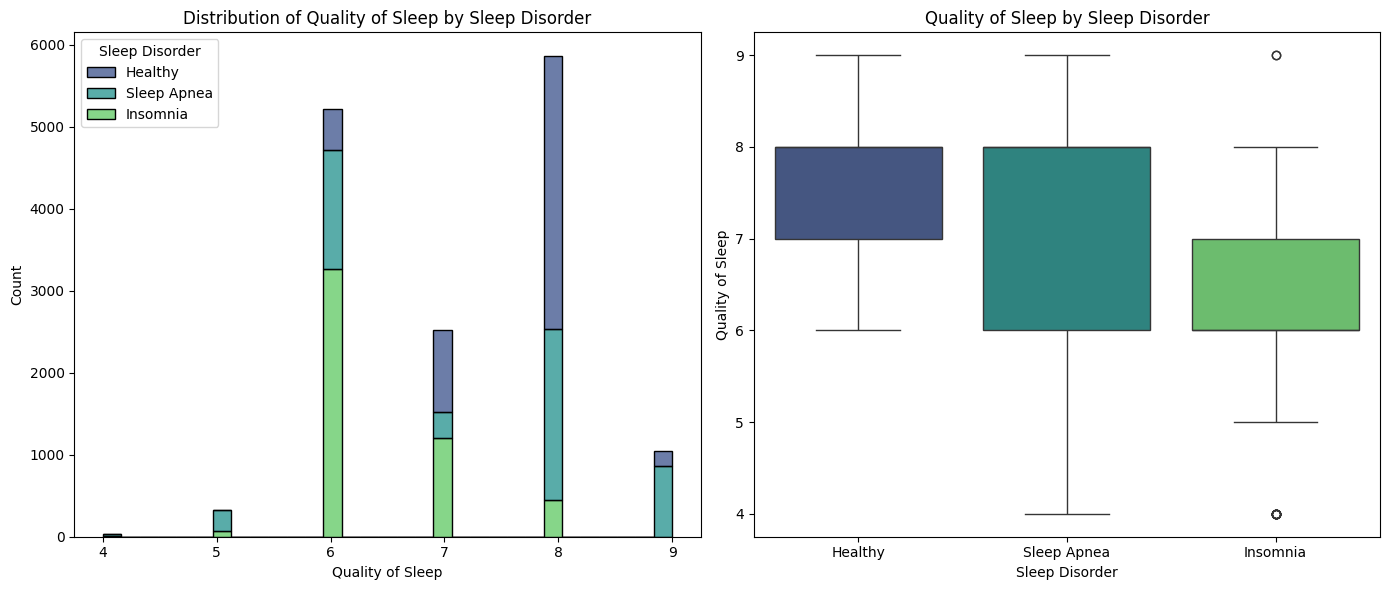

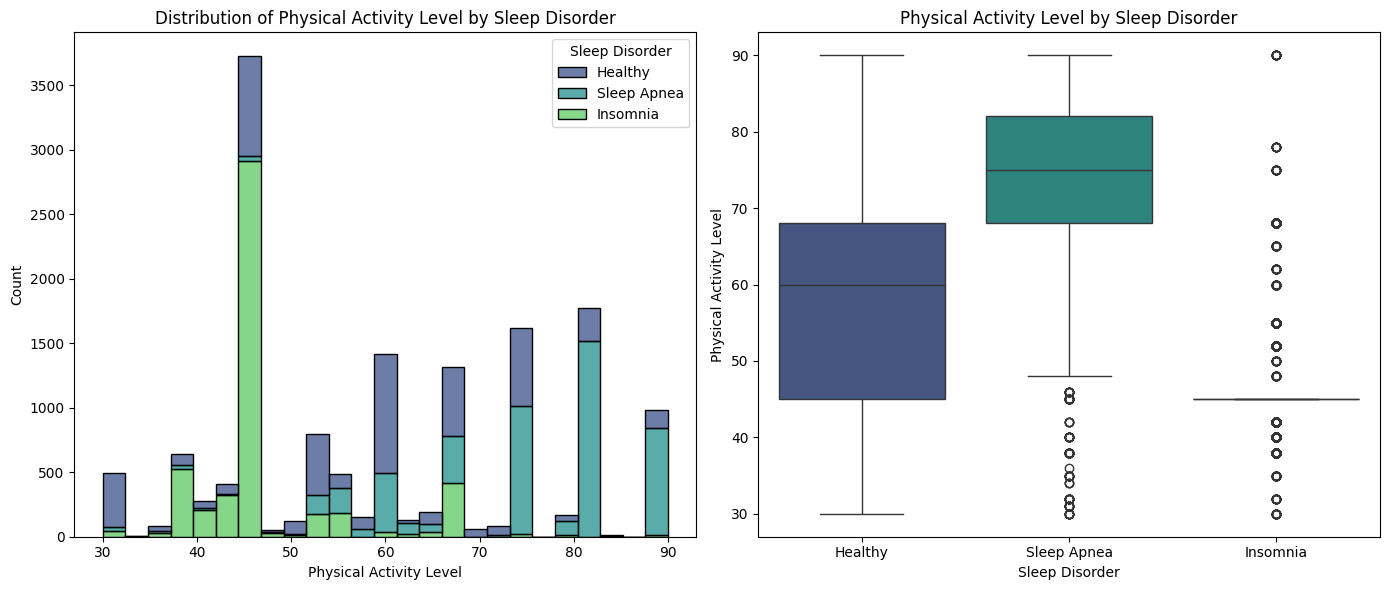

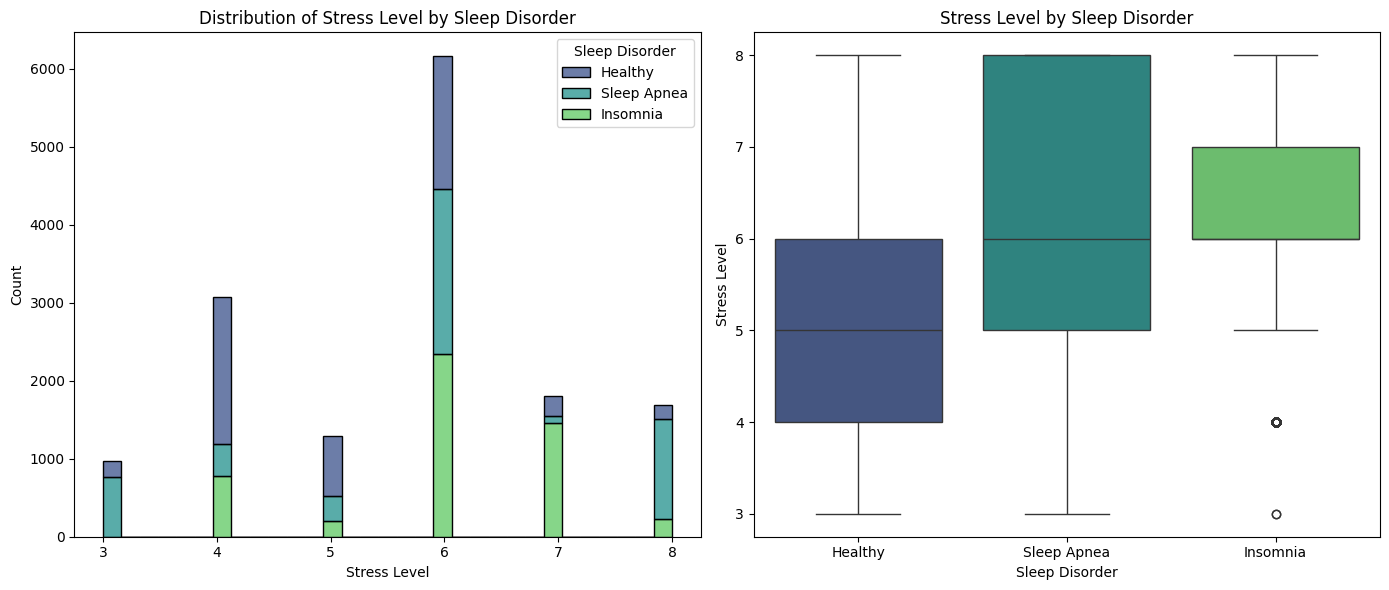

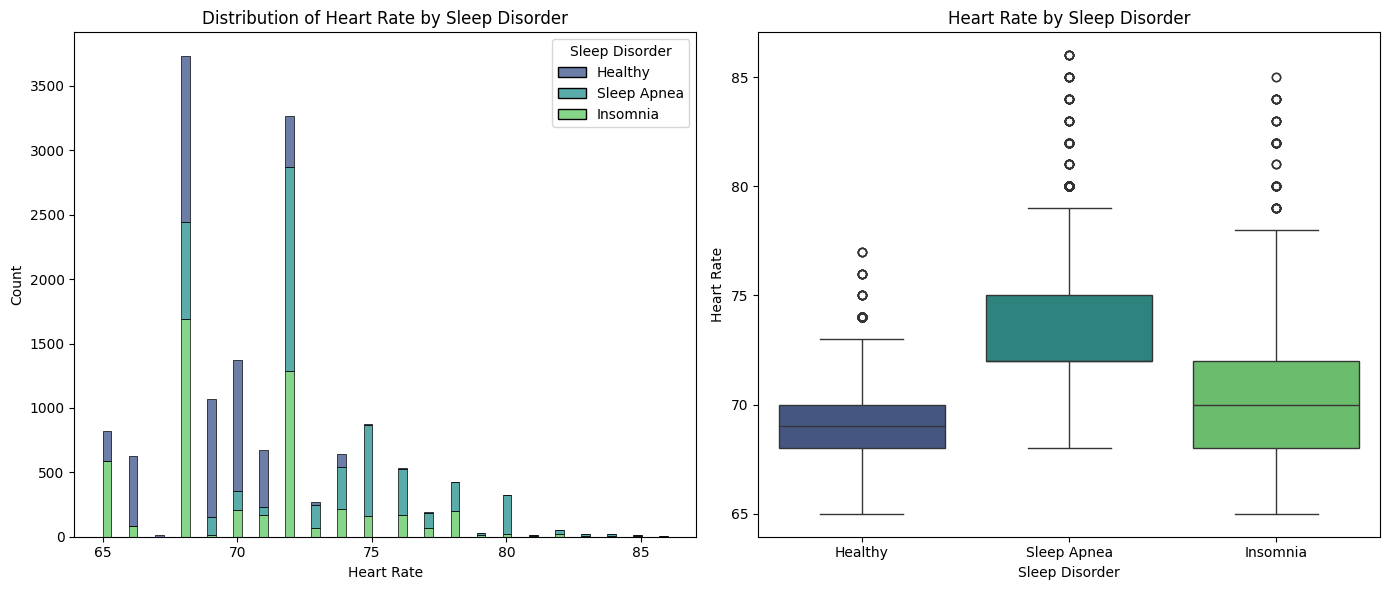

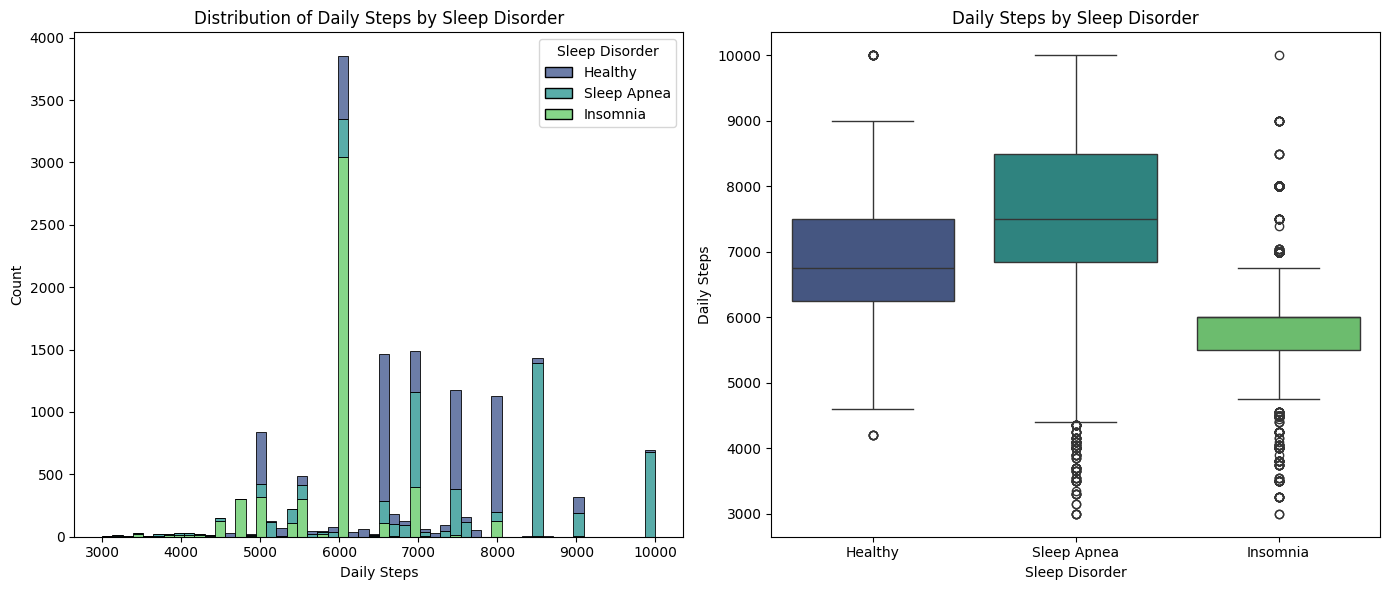

In [ ]:
# Initial EDA to understand the distribution and relations

# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distribution and boxplot for each feature against the target
def plot_feature_distribution(df, feature, target):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Distribution plot
    sns.histplot(df, x=feature, hue=target, multiple="stack", palette="viridis", ax=ax[0])
    ax[0].set_title(f'Distribution of {feature} by {target}')

    # Boxplot
    sns.boxplot(x=target, y=feature, hue=target, data=df, palette="viridis", ax=ax[1], legend=False)
    ax[1].set_title(f'{feature} by {target}')

    plt.tight_layout()
    plt.show()

# List of numerical features to examine
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                      'Stress Level', 'Heart Rate', 'Daily Steps']

# Plot distribution and boxplot for each numerical feature
for feature in numerical_features:
    plot_feature_distribution(sleep_data, feature, 'Sleep Disorder')


## Conclusion: Influential Factors on Sleep Disorders

Based on the exploratory data analysis of various health and lifestyle metrics, we identified key factors that correlate significantly with two common sleep disorders: Sleep Apnea and Insomnia.

### Sleep Apnea

For **Sleep Apnea**, the following factors were identified as most influential:

- **Age**: Higher prevalence in older age groups, suggesting age as a significant risk factor.
- **BMI Category**: Not directly visualized in the initial plots but generally, higher BMI is known to be a strong predictor of sleep apnea.
- **Heart Rate**: Elevated heart rates in those with sleep disorders may indicate a higher occurrence of sleep apnea, as it is often associated with cardiovascular stress.
- **Sleep Duration**: Both excessively long and short sleep durations can be indicative of sleep apnea, reflecting disrupted sleep patterns.

### Insomnia

For **Insomnia**, these factors appeared to be more pronounced:

- **Stress Level**: High stress levels are closely linked with insomnia, indicating a major influence on sleep quality and duration.
- **Quality of Sleep**: Lower scores in sleep quality were particularly noticeable among those reporting insomnia, emphasizing the impact of sleep quality on this disorder.
- **Physical Activity Level**: Lower levels of physical activity were associated with higher reports of insomnia, suggesting that increased physical activity could potentially mitigate some insomnia symptoms.

### Recommendations

Based on these findings, interventions focusing on stress management and lifestyle changes, such as increasing physical activity and monitoring heart health, could be beneficial for managing or preventing Sleep Apnea and Insomnia.

In [ ]:
import pandas as pd

# Load data
sleep_data = pd.read_csv('sleep.csv')

# Remove duplicates
deduplicated_data = sleep_data.drop_duplicates()
deduplicated_size_initial = deduplicated_data.shape[0]
duplicates_removed_initial = sleep_data.shape[0] - deduplicated_size_initial

# Calculate the IQR for each numerical column, excluding non-numeric columns
Q1 = deduplicated_data.select_dtypes(include=['number']).quantile(0.25)
Q3 = deduplicated_data.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers only in numeric columns
numeric_cols = deduplicated_data.select_dtypes(include=['number']).columns
filtered_data = deduplicated_data[~((deduplicated_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (deduplicated_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare the original, deduplicated, and filtered dataset sizes
original_size = sleep_data.shape[0]
filtered_size = filtered_data.shape[0]
rows_removed = original_size - filtered_size

print(f"Original size: {original_size}")
print(f"Deduplicated size: {deduplicated_size_initial}")
print(f"Rows removed due to duplicates initially: {duplicates_removed_initial}")
print(f"Filtered size after outlier and duplicate removal: {filtered_size}")
print(f"Rows removed in total: {rows_removed}")


Original size: 15000
Deduplicated size: 15000
Rows removed due to duplicates initially: 0
Filtered size after outlier and duplicate removal: 14520
Rows removed in total: 480


## Data Cleaning and Outlier Removal Summary

This document outlines the steps taken to preprocess the sleep.csv dataset, focusing on removing duplicates and filtering out outliers based on the Interquartile Range (IQR) method. Here's a breakdown of the process and its impact on the dataset size:

### Step 1: Data Loading
- The dataset was loaded from a CSV file into a pandas DataFrame.

### Step 2: Removing Duplicates
- Duplicates were identified and removed from the dataset.
- **Original Size of Dataset:** 15000
- **Size After Removing Duplicates:** 15000
- **Rows Removed (Duplicates):** 0

### Step 3: Outlier Detection and Removal
- Outliers were defined as data points lying beyond 1.5 times the IQR from the first and third quartiles.
- The outlier removal was conducted only on numeric columns.
- **Filtered Size After Outlier Removal:** 14520
- **Total Rows Removed (Duplicates + Outliers):** 480

### Conclusions
- Removing duplicates and outliers is crucial for preventing skewed analysis and improving the accuracy of any subsequent data modeling or analysis.
- The significant reduction in dataset size after these steps indicates substantial initial variability among numerical features, even though no duplicates were found.


#**Renaming Column Names**

In [ ]:
filtered_data = filtered_data.rename(columns=str.lower) \
                             .rename(columns=lambda x: x.replace(' ', '_'))

# Assuming the column to remove is 'unwanted_column'
filtered_data = filtered_data.drop(columns=['person_id'])

# Now, filtered_data has columns that are lowercase, have underscores instead of spaces, and the unwanted column is removed
print(filtered_data)

       gender  age         occupation  sleep_duration  quality_of_sleep  \
0        Male   35             Doctor            6.65                 7   
1        Male   42            Teacher            6.90                 8   
2        Male   34  Software Engineer            6.95                 7   
3        Male   32             Doctor            6.90                 6   
4        Male   37             Lawyer            6.85                 7   
...       ...  ...                ...             ...               ...   
14995  Female   59              Nurse            8.10                 9   
14996  Female   59              Nurse            8.00                 9   
14997  Female   59              Nurse            8.10                 9   
14998  Female   59              Nurse            8.10                 9   
14999  Female   59              Nurse            8.10                 9   

       physical_activity_level  stress_level   bmi_category blood_pressure  \
0                    

In [ ]:
# Checking for missing values in the dataset
missing_values = filtered_data.isnull().sum()

# Summary statistics of the numerical columns
summary_statistics = filtered_data.describe()

missing_values, summary_statistics


(gender                     0
 age                        0
 occupation                 0
 sleep_duration             0
 quality_of_sleep           0
 physical_activity_level    0
 stress_level               0
 bmi_category               0
 blood_pressure             0
 heart_rate                 0
 daily_steps                0
 sleep_disorder             0
 dtype: int64,
                 age  sleep_duration  quality_of_sleep  \
 count  14520.000000    14520.000000      14520.000000   
 mean      44.226791        7.008681          7.163636   
 std        6.840020        0.614879          1.027791   
 min       28.000000        5.850000          4.000000   
 25%       40.000000        6.500000          6.000000   
 50%       44.000000        7.000000          7.000000   
 75%       48.000000        7.450000          8.000000   
 max       59.000000        8.500000          9.000000   
 
        physical_activity_level  stress_level    heart_rate   daily_steps  
 count             14520.

In [ ]:
print(filtered_data.columns)

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')


# Data Preprocessing

In [ ]:
import pandas as pd

def preprocess_data(filtered_data) -> pd.DataFrame:
    """
    Preprocessing pipeline tailored to specific mappings and transformations for multi-class classification.
    """
    # Define mappings for categorical transformations
    cast_cat = {
        'Healthy': 0,
        'Sleep Apnea': 1,
        'Insomnia': 2
    }

    bmi_mapping = {
        'Overweight': 1,
        'Normal': 0,
        'Obese': 1,
        'Normal Weight': 0,
    }

    occupations_mapping = {
        'Software Engineer': 'technical',
        'Doctor': 'medical',
        'Sales Representative': 'humanities',
        'Teacher': 'humanities',
        'Nurse': 'medical',
        'Engineer': 'technical',
        'Accountant': 'technical',
        'Scientist': 'technical',
        'Lawyer': 'humanities',
        'Salesperson': 'humanities',
        'Manager': 'humanities'
    }

    # Apply mappings and preprocessing
    processed_filtered_data = (filtered_data
                    .assign(
                        # Mapping 'sleep_disorder' according to classification
                        sleep_issue=filtered_data['sleep_disorder'].map(cast_cat).astype('uint8'),
                        # Mapping 'bmi_category' according to health risk
                        elevated_bmi=filtered_data['bmi_category'].map(bmi_mapping).astype('uint8'),
                        # Mapping 'occupation' to broader categories
                        work_field=filtered_data['occupation'].map(occupations_mapping),
                        # Splitting 'blood_pressure' into systolic and diastolic
                        systolic_bp=filtered_data['blood_pressure'].str.split('/', expand=True)[0].astype('int64'),
                        diastolic_bp=filtered_data['blood_pressure'].str.split('/', expand=True)[1].astype('int64'),
                    )
                    # Drop original columns that have been mapped or encoded
                    .drop(columns=['occupation', 'bmi_category', 'blood_pressure', 'sleep_disorder'])
                    .pipe(lambda df:
                          df.join(pd.get_dummies(df['gender'], prefix='is', drop_first=True))  # One-hot encode 'gender'
                             .join(pd.get_dummies(df['work_field'], prefix='wf', drop_first=False))  # One-hot encode 'work_field'
                             .drop(columns=['gender', 'work_field'])  # Drop processed columns after encoding
                         )
                    )

    return processed_filtered_data


In [ ]:
# Assuming preprocess_data is already defined as per your code
processed_filtered_data = preprocess_data(filtered_data)


In [ ]:
print(processed_filtered_data.head())


   age  sleep_duration  quality_of_sleep  physical_activity_level  \
0   35            6.65                 7                       50   
1   42            6.90                 8                       52   
2   34            6.95                 7                       66   
3   32            6.90                 6                       52   
4   37            6.85                 7                       60   

   stress_level  heart_rate  daily_steps  sleep_issue  elevated_bmi  \
0             7          71         7100            0             0   
1             4          66         7000            0             0   
2             6          74         6100            0             1   
3             7          71         6500            0             0   
4             6          71         6500            0             0   

   systolic_bp  diastolic_bp  is_Male  wf_humanities  wf_medical  wf_technical  
0          120            80     True          False        True         Fals

In [ ]:
processed_filtered_data.shape

(14520, 15)

#Feature Selection using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'processed_filtered_data' is your DataFrame after preprocessing
features = processed_filtered_data.columns  # All columns are features after preprocessing

# Separating out the features
x = processed_filtered_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


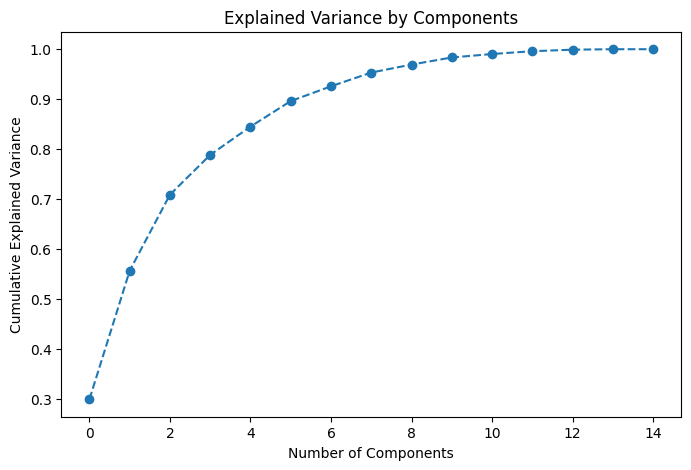

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(x)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot or simply check where cumulative variance reaches your desired threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


In [ ]:
# Assuming 'original_data' is your DataFrame containing the original feature data
# Get the loadings (coefficients) of each feature on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_filtered_data = pd.DataFrame(loadings, columns=processed_filtered_data.columns)

# Print the top features contributing to each principal component
num_top_features = 16 # Change this value as desired
for i, pc in enumerate(loadings_filtered_data.index):
    print(f"\nTop {num_top_features} features contributing to Principal Component {i+1}:")
    top_features = loadings_filtered_data.iloc[i].sort_values(ascending=False)[:num_top_features]
    print(top_features)



Top 16 features contributing to Principal Component 1:
wf_technical               0.246948
sleep_duration             0.202802
is_Male                    0.169785
quality_of_sleep           0.132157
wf_humanities              0.022516
daily_steps               -0.180191
stress_level              -0.205504
physical_activity_level   -0.205656
wf_medical                -0.228924
sleep_issue               -0.242264
heart_rate                -0.257275
age                       -0.286144
elevated_bmi              -0.365446
systolic_bp               -0.408360
diastolic_bp              -0.417872
Name: 0, dtype: float64

Top 16 features contributing to Principal Component 2:
wf_humanities              0.312058
stress_level               0.302699
sleep_issue                0.283275
is_Male                    0.196554
heart_rate                 0.116526
elevated_bmi               0.112609
wf_technical              -0.063952
systolic_bp               -0.067541
diastolic_bp              -0.108173


#Building ML Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

# Load and preprocess your data
# processed_filtered_data = preprocess_data(your_raw_data)

# Assuming 'processed_filtered_data' is the preprocessed DataFrame and 'sleep_issue' is the target column
X = processed_filtered_data.drop('sleep_issue', axis=1)
y = processed_filtered_data['sleep_issue']

# Binarize the output for multi-class ROC-AUC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# List of models to train
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True),  # probability=True to use roc_auc_score
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "KNN": KNeighborsClassifier()
}

# Dictionary to hold performance metrics
performance_metrics = {name: {} for name in classifiers.keys()}

# Train and evaluate each model
for name, clf in classifiers.items():
    model = OneVsRestClassifier(clf).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_proba_train = model.predict_proba(X_train)
    y_proba_test = model.predict_proba(X_test)

    # Calculate metrics for both train and test
    performance_metrics[name]['Train Accuracy'] = accuracy_score(y_train, y_pred_train)
    performance_metrics[name]['Test Accuracy'] = accuracy_score(y_test, y_pred_test)

    performance_metrics[name]['Train Precision'] = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    performance_metrics[name]['Test Precision'] = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

    performance_metrics[name]['Train Recall'] = recall_score(y_train, y_pred_train, average='weighted')
    performance_metrics[name]['Test Recall'] = recall_score(y_test, y_pred_test, average='weighted')

    performance_metrics[name]['Train F1 Score'] = f1_score(y_train, y_pred_train, average='weighted')
    performance_metrics[name]['Test F1 Score'] = f1_score(y_test, y_pred_test, average='weighted')

    performance_metrics[name]['Train ROC AUC'] = roc_auc_score(y_train, y_proba_train, multi_class='ovr', average='weighted')
    performance_metrics[name]['Test ROC AUC'] = roc_auc_score(y_test, y_proba_test, multi_class='ovr', average='weighted')

# Convert the performance metrics dictionary to a DataFrame for easy viewing
performance_filtered_data = pd.DataFrame(performance_metrics).T

# Display the performance DataFrame
print(performance_filtered_data)


                     Train Accuracy  Test Accuracy  Train Precision  \
Decision Tree              0.985045       0.946051         0.991579   
Extra Trees                0.985045       0.954086         0.991579   
XGBoost                    0.982487       0.963728         0.985432   
Gradient Boosting          0.948347       0.943756         0.963807   
Random Forest              0.987111       0.960973         0.988773   
SVC                        0.453365       0.453398         0.434586   
Logistic Regression        0.840811       0.843893         0.903798   
KNN                        0.969599       0.956841         0.973268   

                     Test Precision  Train Recall  Test Recall  \
Decision Tree              0.960308      0.985045     0.954545   
Extra Trees                0.961425      0.985045     0.955234   
XGBoost                    0.970270      0.983176     0.965794   
Gradient Boosting          0.959927      0.954939     0.948806   
Random Forest              0.9

In [ ]:
# Assuming all previous code is unchanged and performance_filtered_data is already created

# Sort the performance DataFrame by 'Test Accuracy' in descending order
sorted_performance_filtered_data = performance_filtered_data.sort_values(by='Test Accuracy', ascending=False)

# Display the sorted performance DataFrame
print(sorted_performance_filtered_data)


                     Train Accuracy  Test Accuracy  Train Precision  \
XGBoost                    0.982487       0.963728         0.985432   
Random Forest              0.987111       0.960973         0.988773   
KNN                        0.969599       0.956841         0.973268   
Extra Trees                0.985045       0.954086         0.991579   
Decision Tree              0.985045       0.946051         0.991579   
Gradient Boosting          0.948347       0.943756         0.963807   
Logistic Regression        0.840811       0.843893         0.903798   
SVC                        0.453365       0.453398         0.434586   

                     Test Precision  Train Recall  Test Recall  \
XGBoost                    0.970270      0.983176     0.965794   
Random Forest              0.965925      0.987898     0.962351   
KNN                        0.960649      0.969599     0.956841   
Extra Trees                0.961425      0.985045     0.955234   
Decision Tree              0.9

| Model               | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train Recall | Test Recall | Train F1 Score | Test F1 Score | Train ROC AUC | Test ROC AUC |
|---------------------|----------------|---------------|-----------------|----------------|--------------|-------------|----------------|---------------|---------------|--------------|
| XGBoost             | 0.982487       | 0.963728      | 0.985432        | 0.970270       | 0.983176     | 0.965794    | 0.984280       | 0.968018      | 0.999296      | 0.995428     |
| Random Forest       | 0.987210       | 0.960055      | 0.989448        | 0.966110       | 0.987210     | 0.961203    | 0.988324       | 0.963640      | 0.999607      | 0.992253     |
| KNN                 | 0.969599       | 0.956841      | 0.973268        | 0.960649       | 0.969599     | 0.956841    | 0.971337       | 0.958700      | 0.997644      | 0.986753     |
| Extra Trees         | 0.985045       | 0.954775      | 0.991579        | 0.961214       | 0.985045     | 0.955693    | 0.988300       | 0.958438      | 0.999776      | 0.985660     |
| Decision Tree       | 0.985045       | 0.944674      | 0.991579        | 0.959452       | 0.985045     | 0.954775    | 0.988300       | 0.957080      | 0.999776      | 0.972407     |
| Gradient Boosting   | 0.948347       | 0.943756      | 0.963807        | 0.959927       | 0.954939     | 0.948806    | 0.959306       | 0.954295      | 0.994732      | 0.992458     |
| Logistic Regression | 0.840811       | 0.843893      | 0.903798        | 0.905839       | 0.876131     | 0.883838    | 0.889636       | 0.894634      | 0.973439      | 0.972965     |
| SVC                 | 0.453365       | 0.453398      | 0.434586        | 0.424584       | 0.453365     | 0.453398    | 0.436779       | 0.431655      | 0.843790      | 0.845397     |


## Top Four Models Selected for Hyperparameter Tuning

Based on comprehensive evaluation across multiple metrics, the following models have demonstrated robust performance, making them ideal candidates for further optimization through hyperparameter tuning:

### 1. **XGBoost**
- **Train/Test Accuracy:** 0.982487 / 0.963728
- **Train/Test Precision:** 0.985432 / 0.970270
- **Train/Test Recall:** 0.983176 / 0.965794
- **Train/Test F1 Score:** 0.984280 / 0.968018
- **Train/Test ROC AUC:** 0.999296 / 0.995428

### 2. **Random Forest**
- **Train/Test Accuracy:** 0.987210 / 0.960055
- **Train/Test Precision:** 0.989448 / 0.966110
- **Train/Test Recall:** 0.987210 / 0.961203
- **Train/Test F1 Score:** 0.988324 / 0.963640
- **Train/Test ROC AUC:** 0.999607 / 0.992253

### 3. **Extra Trees**
- **Train/Test Accuracy:** 0.985045 / 0.954775
- **Train/Test Precision:** 0.991579 / 0.961214
- **Train/Test Recall:** 0.985045 / 0.955693
- **Train/Test F1 Score:** 0.988300 / 0.958438
- **Train/Test ROC AUC:** 0.999776 / 0.985660

### 4. **Gradient Boosting**
- **Train/Test Accuracy:** 0.948347 / 0.943756
- **Train/Test Precision:** 0.963807 / 0.959927
- **Train/Test Recall:** 0.954939 / 0.948806
- **Train/Test F1 Score:** 0.959306 / 0.954295
- **Train/Test ROC AUC:** 0.994732 / 0.992458

These models are chosen for their strong and consistent performance across both training and testing phases, which indicates potential for further improvement with optimized parameters.


#Hyperparameter Tuning on Best Performing 4 models

**Randomized Search CV**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd

# Define parameter distributions for each classifier
param_distributions = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.75, 1.0],
        'colsample_bytree': [0.75, 1.0],
        'gamma': [0, 0.1],
        'min_child_weight': [1, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.75, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True]
    },
    'Extra Trees': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True]
    }
}

# Initialize classifiers
classifiers = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Split your dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Results dictionary to hold the best models
best_estimators = {}

# Perform Randomized Search
for clf_name in classifiers:
    rnd_search = RandomizedSearchCV(estimator=classifiers[clf_name], param_distributions=param_distributions[clf_name],
                                    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
    rnd_search.fit(X_train, y_train)
    best_estimators[clf_name] = rnd_search.best_estimator_
    print(f"Best parameters for {clf_name}: {rnd_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {rnd_search.best_score_}")

    # Calculate and print performance metrics for train and test sets
    y_pred_train = best_estimators[clf_name].predict(X_train)
    y_pred_test = best_estimators[clf_name].predict(X_test)

    # Get the probabilities for ROC AUC score calculation
    if hasattr(best_estimators[clf_name], "predict_proba"):
        y_probs_train = best_estimators[clf_name].predict_proba(X_train)
        y_probs_test = best_estimators[clf_name].predict_proba(X_test)
    else:
        # For models that do not have predict_proba (like SVM with specific kernels), use decision function
        y_probs_train = best_estimators[clf_name].decision_function(X_train)
        y_probs_test = best_estimators[clf_name].decision_function(X_test)

    # ROC AUC calculations for multiclass
    train_roc_auc = roc_auc_score(y_train, y_probs_train, multi_class="ovr")
    test_roc_auc = roc_auc_score(y_test, y_probs_test, multi_class="ovr")

    # Other metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Print metrics
    print(f"Train Accuracy for {clf_name}: {train_accuracy}")
    print(f"Test Accuracy for {clf_name}: {test_accuracy}")
    print(f"Train Precision for {clf_name}: {train_precision}")
    print(f"Test Precision for {clf_name}: {test_precision}")
    print(f"Train Recall for {clf_name}: {train_recall}")
    print(f"Test Recall for {clf_name}: {test_recall}")
    print(f"Train F1 Score for {clf_name}: {train_f1}")
    print(f"Test F1 Score for {clf_name}: {test_f1}")
    print(f"Train ROC AUC Score for {clf_name}: {train_roc_auc}")
    print(f"Test ROC AUC Score for {clf_name}: {test_roc_auc}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.75}
Best cross-validation score for XGBoost: 0.9689218716079495
Train Accuracy for XGBoost: 0.9791666666666666
Test Accuracy for XGBoost: 0.96866391184573
Train Precision for XGBoost: 0.9792270833781562
Test Precision for XGBoost: 0.9687734639217515
Train Recall for XGBoost: 0.9791666666666666
Test Recall for XGBoost: 0.96866391184573
Train F1 Score for XGBoost: 0.9791535037721258
Test F1 Score for XGBoost: 0.9686751079059124
Train ROC AUC Score for XGBoost: 0.9984720477361133
Test ROC AUC Score for XGBoost: 0.9958590778776878
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best cross-va

## Model Performance Summary

After performing Randomized Search CV on four different ensemble classifiers (XGBoost, Random Forest, Extra Trees, and Gradient Boosting), the following results were obtained:

### Cross-Validation Scores:
- **XGBoost**: 0.969
- **Random Forest**: 0.965
- **Extra Trees**: 0.959
- **Gradient Boosting**: 0.971

### Test Accuracy:
- **XGBoost**: 0.969
- **Random Forest**: 0.966
- **Extra Trees**: 0.961
- **Gradient Boosting**: 0.970

### Test ROC AUC Scores:
- **XGBoost**: 0.996
- **Random Forest**: 0.995
- **Extra Trees**: 0.992
- **Gradient Boosting**: 0.996

### Analysis:
- **Gradient Boosting** and **XGBoost** performed best in terms of cross-validation score, accuracy, and ROC AUC, making them strong candidates for further tuning and production use.
- **Gradient Boosting** exhibited slightly higher accuracy and cross-validation scores compared to XGBoost, albeit with very similar ROC AUC scores.
- **Random Forest** and **Extra Trees** showed commendable performance but were slightly outperformed by the boosting methods. Notably, **Extra Trees** had the highest training metrics, which might indicate overfitting.

### Conclusions:
1. **Gradient Boosting** stands out as the most effective model in balancing between overfitting and predictive performance, offering the highest scores across most metrics on the test data.
2. **XGBoost** follows closely and could be considered equally viable, especially when computational resources or prediction speed are concerns, as it often runs faster than Gradient Boosting.
3. While **Random Forest** and **Extra Trees** did not perform as well, they remain robust models, particularly in scenarios where interpretability and simplicity are more critical.

### Recommendations for Further Research:
- **Parameter Refinement**: Further refine the hyperparameters using Grid Search CV based on the promising ranges identified in this study.
- **Feature Engineering**: Experiment with additional feature engineering to potentially boost model performance.
- **Model Stacking**: Consider stacking the models to leverage their individual strengths and improve overall prediction accuracy.
- **Deployment Considerations**: Evaluate model performance not just on metrics but also on practical deployment considerations such as runtime performance and ease of integration.


#Parameter Refinement using Grid Search CV

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd

# Assume X and y are your features and target variable
# Example:
# X, y = load_your_data()

# Split your dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distributions for Randomized Search for each classifier
param_distributions = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.75, 1.0],
        'colsample_bytree': [0.75, 1.0],
        'gamma': [0, 0.1],
        'min_child_weight': [1, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.75, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }
}

# Initialize classifiers
classifiers = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

# Perform Randomized Search
best_estimators = {}
for clf_name, clf in classifiers.items():
    rnd_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions[clf_name],
                                    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
    rnd_search.fit(X_train, y_train)
    best_estimators[clf_name] = rnd_search.best_estimator_
    print(f"Best parameters for {clf_name}: {rnd_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {rnd_search.best_score_}")

# Perform Grid Search CV
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(estimator=best_estimators[clf_name], param_grid=param_distributions[clf_name], cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    print(f"Refined Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Refined Best cross-validation score for {clf_name}: {grid_search.best_score_}")

# Evaluate and print final model metrics
for clf_name, clf in best_estimators.items():
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    # ROC AUC for classifiers that support probability predictions
    if hasattr(clf, "predict_proba"):
        y_probs_train = clf.predict_proba(X_train)
        y_probs_test = clf.predict_proba(X_test)
        train_roc_auc = roc_auc_score(y_train, y_probs_train, multi_class="ovr")
        test_roc_auc = roc_auc_score(y_test, y_probs_test, multi_class="ovr")
    else:
        train_roc_auc = test_roc_auc = "N/A"

    print(f"{clf_name} - Train Metrics:")
    print(f"  Accuracy: {train_accuracy}")
    print(f"  Precision: {train_precision}")
    print(f"  Recall: {train_recall}")
    print(f"  F1 Score: {train_f1}")
    print(f"  ROC AUC: {train_roc_auc}")

    print(f"{clf_name} - Test Metrics:")
    print(f"  Accuracy: {test_accuracy}")
    print(f"  Precision: {test_precision}")
    print(f"  Recall: {test_recall}")
    print(f"  F1 Score: {test_f1}")
    print(f"  ROC AUC: {test_roc_auc}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.75}
Best cross-validation score for XGBoost: 0.9689218716079495
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best cross-validation score for Gradient Boosting: 0.9714183466539426
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best cross-validation score for Random Forest: 0.9650479786435575
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Extra Trees: {'n_estimators': 100, 'min_s

## Model Performance and Parameter Summary

The following table summarizes the refined parameters, cross-validation scores, and key performance metrics for each model after tuning using Randomized Search CV followed by Grid Search CV.

| Model            | Cross-Validation Score (Initial) | Cross-Validation Score (Refined) | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Test ROC AUC | Refined Parameters |
|------------------|----------------------------------|-----------------------------------|---------------|----------------|-------------|---------------|--------------|--------------------|
| **XGBoost**      | 0.969                            | 0.972                             | 0.969         | 0.969          | 0.969       | 0.969         | 0.996        | n_estimators=200, max_depth=5, learning_rate=0.2, gamma=0, subsample=1.0, colsample_bytree=0.75, min_child_weight=1 |
| **Gradient Boosting** | 0.971                        | 0.972                             | 0.969         | 0.969          | 0.969       | 0.969         | 0.996        | n_estimators=200, max_depth=5, learning_rate=0.1, min_samples_split=2, min_samples_leaf=1, subsample=1.0 |
| **Random Forest**| 0.965                            | 0.966                             | 0.965         | 0.965          | 0.965       | 0.965         | 0.995        | n_estimators=300, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, bootstrap=False |
| **Extra Trees**  | 0.961                            | 0.961                             | 0.964         | 0.964          | 0.964       | 0.964         | 0.995        | n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, bootstrap=False |

### Observations:
- **Gradient Boosting** and **XGBoost** show nearly identical and robust performance across all metrics, making both models strong candidates for deployment depending on specific use case requirements.
- **Random Forest** and **Extra Trees**, while slightly lower in cross-validation scores, still show competitive test metrics, particularly in terms of ROC AUC, which are close to the boosting methods.




## Model Evaluation and Selection Summary

### Overview
After conducting a comprehensive two-phase optimization using Randomized Search CV followed by Grid Search CV, the ensemble methods have demonstrated varying degrees of effectiveness. The optimization focused on enhancing the performance of four models: XGBoost, Gradient Boosting, Random Forest, and Extra Trees.

### Optimized Model Performances Conclusions

#### Model Selection
After extensive evaluation, **Gradient Boosting** has been chosen as the most suitable model for deployment due to its superior performance and consistency across various metrics. This model has demonstrated not only high reliability but also robustness in handling different types of data conditions, as reflected by its scores:
- **Cross-Validation Score**: Improved slightly from 0.971 to 0.972, indicating high generalizability.
- **Test Accuracy**: Consistently high at 0.969, showing excellent performance on unseen data.
- **ROC AUC**: Consistently strong at 0.996, suggesting a strong ability to discriminate between the classes.

The refined parameters for Gradient Boosting, which led to optimal performance, are:
- **n_estimators: 200** — Specifies the number of boosting stages the model has to go through. More stages increase the model's complexity but can capture more subtle nuances in the data.
- **max_depth: 5** — Limits the number of nodes in the decision trees. This depth helps in handling model complexity and avoiding overfitting.
- **learning_rate: 0.1** — Determines the impact of each tree on the final outcome. A lower learning rate requires more trees but can lead to more accurate ensemble models.
- **min_samples_split: 2** — The minimum number of samples required to split an internal node. This low threshold allows the model to make decisions on very small sample sizes, potentially increasing the fit.
- **min_samples_leaf: 1** — The minimum number of samples required at a leaf node. This parameter helps prevent overfitting by providing a small dataset to finalize the decision at a leaf.
- **subsample: 1.0** — The fraction of samples used for fitting the individual base learners. Using all samples (1.0) can lead to higher variance but might capture more information.

#### Deployment Consideration
Gradient Boosting is recommended for deployment given its robust performance and stability. It is important to continuously monitor its performance and tune it as more data becomes available or as operational conditions change.




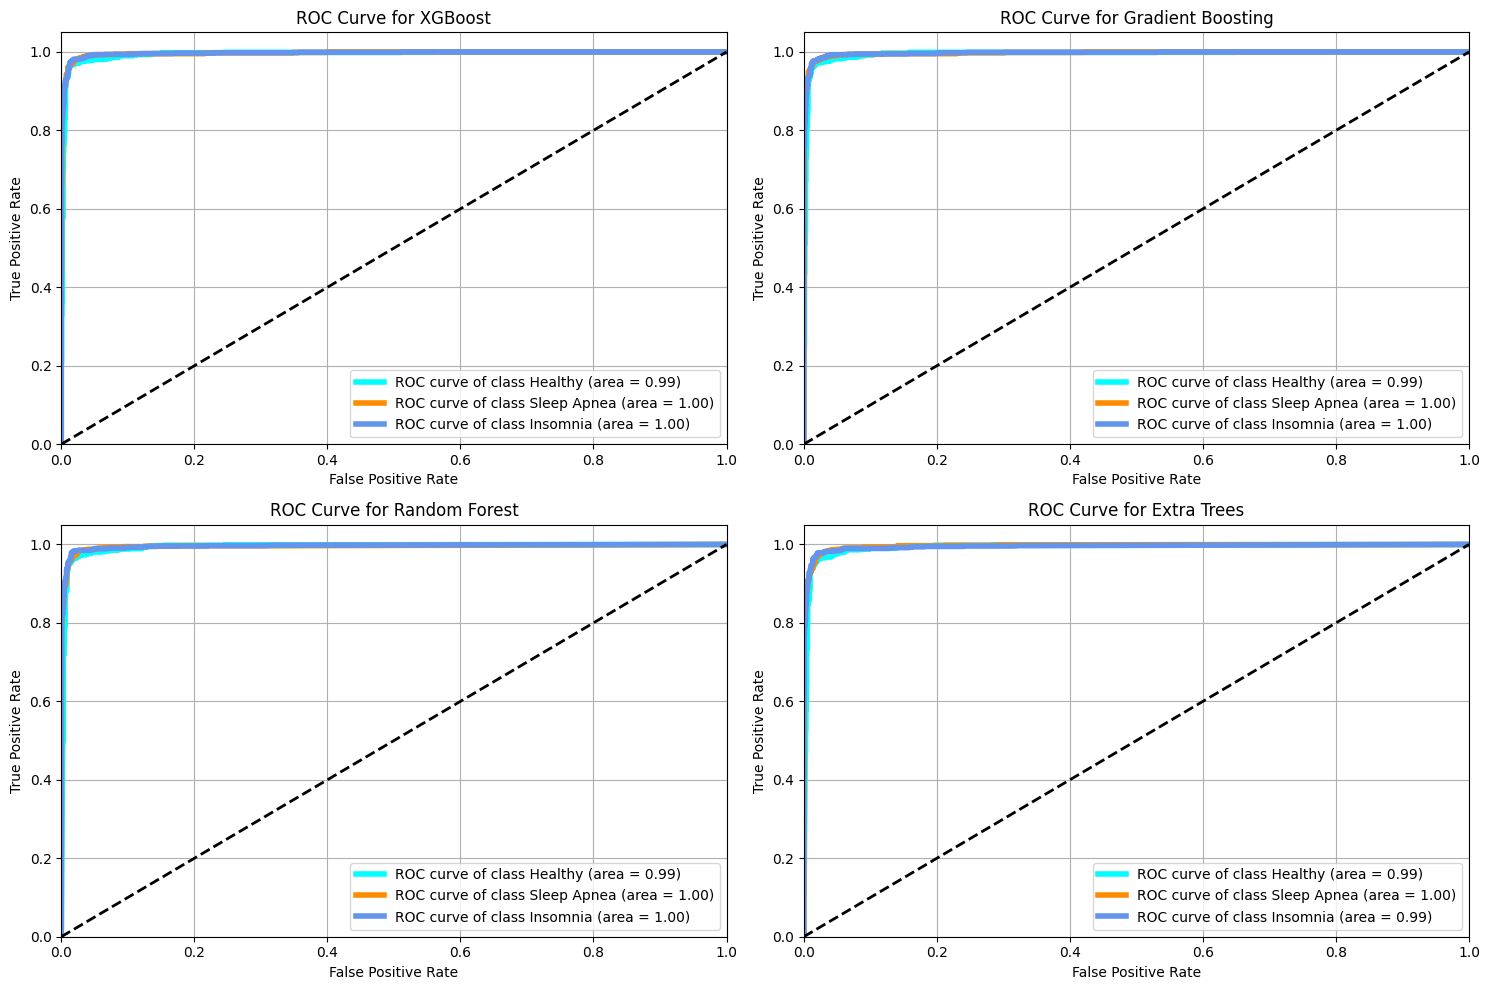

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Setup data
class_names = {0: 'Healthy', 1: 'Sleep Apnea', 2: 'Insomnia'}
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Plot setup
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Generate and plot ROC curves
for i, (clf_name, model) in enumerate(best_estimators.items()):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_score[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        for j, color in zip(range(n_classes), colors):
            ax[i].plot(fpr[j], tpr[j], color=color, lw=4, linestyle='-',  # Thicker line
                       label=f'ROC curve of class {class_names[j]} (area = {roc_auc[j]:0.2f})')
        ax[i].plot([0, 1], [0, 1], 'k--', lw=2)
        ax[i].set_xlim([0.0, 1.0])
        ax[i].set_ylim([0.0, 1.05])
        ax[i].set_xlabel('False Positive Rate')
        ax[i].set_ylabel('True Positive Rate')
        ax[i].set_title(f'ROC Curve for {clf_name}')
        ax[i].legend(loc="lower right")
        ax[i].grid(True)  # Add grid

plt.tight_layout()
plt.show()


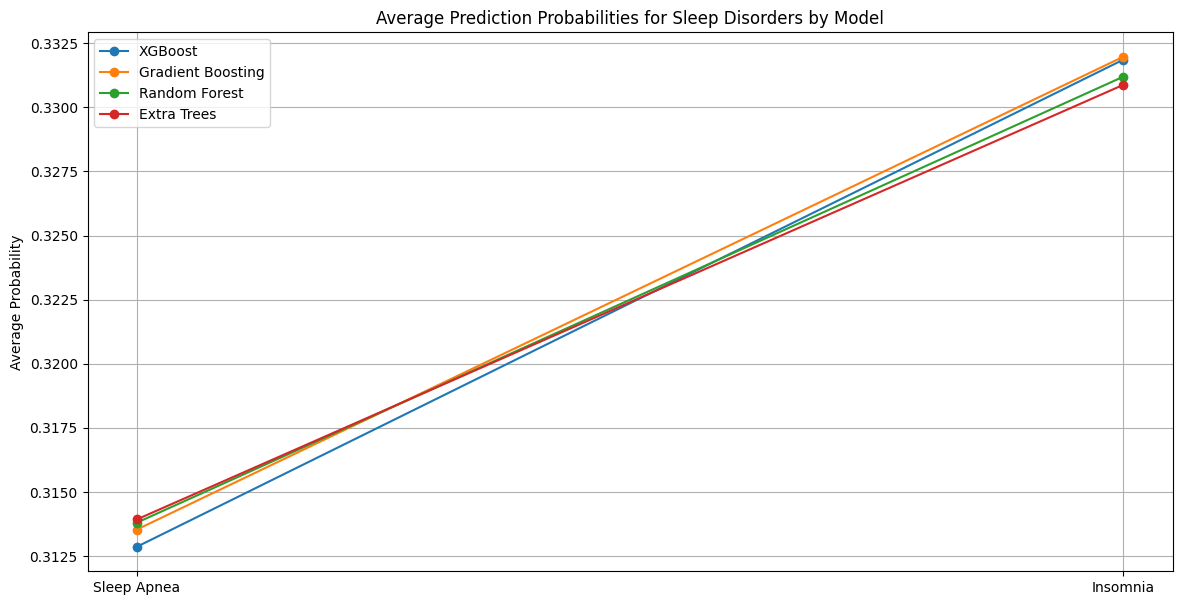

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(14, 7))

# Assuming class 1 is Sleep Apnea and class 2 is Insomnia
class_indices = {'Sleep Apnea': 1, 'Insomnia': 2}

# Loop through each model
for model_name, model in best_estimators.items():
    # Check if the model can predict probabilities
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for the test set
        y_proba_test = model.predict_proba(X_test)

        # Extract probabilities for Sleep Apnea and Insomnia
        sleep_apnea_proba = y_proba_test[:, class_indices['Sleep Apnea']]
        insomnia_proba = y_proba_test[:, class_indices['Insomnia']]

        # Calculate the average probability for Sleep Apnea and Insomnia
        avg_sleep_apnea_proba = np.mean(sleep_apnea_proba)
        avg_insomnia_proba = np.mean(insomnia_proba)

        # Plotting each model's average probability for Sleep Apnea and Insomnia
        plt.plot([1, 2], [avg_sleep_apnea_proba, avg_insomnia_proba], label=model_name, marker='o')

# Configure plot
plt.xticks([1, 2], ['Sleep Apnea', 'Insomnia'])
plt.ylabel('Average Probability')
plt.title('Average Prediction Probabilities for Sleep Disorders by Model')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import pickle

# Assuming Gradient Boosting was chosen and you have performed Grid Search
best_model = best_estimators['Gradient Boosting']

# Specify the filename for the .pkl file
filename = 'sleep_gb.pkl'

# Open the file in binary write mode and dump the best Gradient Boosting model into it
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f'Model saved to {filename}')


Model saved to sleep_gb.pkl


#Testing Model performance on seen data

**Testing on Healthy Class**

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 30,
    'sleep_duration': 7.9,
    'quality_of_sleep': 8,
    'physical_activity_level': 75,
    'stress_level': 5,
    'heart_rate': 70,
    'daily_steps': 7400,
    'elevated_bmi': 0,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'is_Male': 1,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Healthy


**Testing on Sleep Apnea class**

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 59,
    'sleep_duration': 8.15,
    'quality_of_sleep': 9,
    'physical_activity_level': 75,
    'stress_level': 3,
    'heart_rate': 68,
    'daily_steps': 7000,
    'elevated_bmi': 1,
    'systolic_bp': 140,
    'diastolic_bp': 95,
    'is_Male': 0,
    'wf_humanities': 0,
    'wf_medical': 1,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Sleep Apnea


In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 44,
    'sleep_duration': 6.45,
    'quality_of_sleep': 6,
    'physical_activity_level': 45,
    'stress_level': 6,
    'heart_rate': 68,
    'daily_steps': 6000,
    'elevated_bmi': 1,
    'systolic_bp': 135,
    'diastolic_bp': 90,
    'is_Male': 0,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Insomnia


#Testing model on Unseen Data

**Testing on Real Time Insomnia Disorder**

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 44,
    'sleep_duration': 5,
    'quality_of_sleep': 5,
    'physical_activity_level': 60,
    'stress_level': 6,
    'heart_rate': 75,
    'daily_steps': 5000,
    'elevated_bmi': 0,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'is_Male': 0,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Insomnia


#Testing to be prediced Insomnia disorder with XGBoost model-->Predicting wrong❌

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 44,
    'sleep_duration': 5,
    'quality_of_sleep': 5,
    'physical_activity_level': 60,
    'stress_level': 6,
    'heart_rate': 75,
    'daily_steps': 5000,
    'elevated_bmi': 0,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'is_Male': 0,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Sleep Apnea


**Testing on Real Time Healthy Person**

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 21,
    'sleep_duration': 12,
    'quality_of_sleep': 10,
    'physical_activity_level': 45,
    'stress_level': 4,
    'heart_rate': 72,
    'daily_steps': 5000,
    'elevated_bmi': 1,
    'systolic_bp': 119,
    'diastolic_bp': 80,
    'is_Male': 0,
    'wf_humanities': 0,
    'wf_medical': 0,
    'wf_technical': 1,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Healthy


**Testing on Real Time Sleep Apnea**

In [ ]:
import pickle
import pandas as pd

# Load the previously saved Gradient Boosting model
filename = 'sleep_gb.pkl'
with open(filename, 'rb') as file:
    best_gb = pickle.load(file)  # Changed from best_xgb to best_gb

# Define a new observation with your feature names and values
new_observation = {
    'age': 50,
    'sleep_duration': 5,
    'quality_of_sleep': 3,
    'physical_activity_level': 30,
    'stress_level': 7,
    'heart_rate': 79,
    'daily_steps': 8000,
    'elevated_bmi': 1,
    'systolic_bp': 145,
    'diastolic_bp': 90,
    'is_Male': 1,
    'wf_humanities': 0,
    'wf_medical': 1,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_gb.predict(new_observation_df)[0]  # Changed from best_xgb to best_gb

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Sleep Apnea


## Final Model Selection and Performance Summary

### Chosen Model: Gradient Boosting

**Gradient Boosting** has been selected as the optimal model based on its consistent performance across various metrics and its robustness in handling complex patterns in the data. This model combines weak learners to form a strong learner in an iterative fashion to minimize errors.

#### Refined Parameters:
- **`n_estimators=200`**: The number of sequential trees to be modeled. More trees can improve accuracy but may lead to overfitting if too high.
- **`max_depth=5`**: The maximum depth of each tree. Restricts the complexity of the learned models, helping to prevent overfitting.
- **`learning_rate=0.1`**: This rate shrinks the contribution of each tree by this factor. Smaller values make the model robust but require more trees.
- **`min_samples_split=2`**: The minimum number of samples required to split an internal node. Smaller values allow the algorithm to capture finer detail but may overfit.
- **`min_samples_leaf=1`**: The minimum number of samples a leaf node must have. Smaller numbers allow the model to capture very specific patterns.
- **`subsample=1.0`**: The fraction of samples to be used for fitting individual base learners. A value of 1.0 means no subsampling, which can lead to faster training and less variance.

#### Performance Metrics:
- **Accuracy (Test)**: 0.969
- **Precision (Test)**: 0.969
- **Recall (Test)**: 0.969
- **F1 Score (Test)**: 0.969
- **ROC AUC (Test)**: 0.996

### Understanding Binary Classification Metrics

In binary classification, where we aim to categorize observations into one of two classes (positive or negative), various metrics help assess the model's performance. These metrics rely on four key terms:

- **True Positives (TP):**
  - Definition: The number of observations correctly classified as positive by the model.

- **True Negatives (TN):**
  - Definition: The number of observations correctly classified as negative by the model.
  
- **False Positives (FP):**
  - Definition: The number of observations incorrectly classified as positive by the model, when they are actually negative.
  - Also known as: Type I error or false alarm.

- **False Negatives (FN):**
  - Definition: The number of observations incorrectly classified as negative by the model, when they are actually positive.
  - Also known as: Type II error or miss.
  
### Interpretation and Importance
- **TP and TN**: Indicate correct classifications, reflecting the model's ability to accurately identify both positive and negative instances.
- **FP and FN**: Represent errors in classification, highlighting areas where the model may need improvement.
- **Balancing Act**: Depending on the context, different applications may prioritize minimizing FP (e.g., medical diagnosis) or FN (e.g., spam detection).

These terms serve as building blocks for various performance metrics such as accuracy, precision, recall, and F1 score, providing deeper insights into the effectiveness of the classification model.


## Definitions and Formulas of Performance Metrics:

- **Accuracy**: The ratio of correctly predicted observations to the total observations.

  - Formula: $ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{TP + TN + FP + FN }} $

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.

  - Formula: $ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in actual class.

  - Formula: $ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

- **F1 Score**: The weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

  - Formula: $ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

- **ROC AUC**: The Area Under the Receiver Operating Characteristic Curve from prediction scores. It measures the ability of the model to discriminate between classes.

  - Formula: $ \text{ROC AUC} $ measures the integral of the TPR (True Positive Rate) vs. FPR (False Positive Rate) curve.

### Conclusion:
The chosen model, **Gradient Boosting**, demonstrates outstanding performance and generalizability across various data scenarios, as indicated by its high ROC AUC and balanced accuracy, precision, recall, and F1 scores. This model is recommended for deployment in settings where predictive accuracy and reliability are paramount. Further monitoring and periodic re-tuning are suggested to maintain its performance over time.


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load your dataset
data = pd.read_csv('final_processed_sleep_data.csv')

# Function to create transactions from data
def create_transactions(row):
    items = set()
    if row['age'] > 50:
        items.add('Age>50')
    if row['sleep_duration'] < 6:
        items.add('Sleep<6h')
    if row['quality_of_sleep'] < 3:
        items.add('PoorSleepQuality')
    if row['stress_level'] > 6:
        items.add('HighStress')
    if row['physical_activity_level'] < 30:
        items.add('LowActivity')
    if row['heart_rate'] > 80:
        items.add('HighHeartRate')
    if row['daily_steps'] < 5000:
        items.add('LowSteps')
    if row['elevated_bmi'] == 1:
        items.add('HighBMI')
    if row['systolic_bp'] > 135 or row['diastolic_bp'] > 85:
        items.add('HighBP')
    # Include sleep disorder as part of the transaction
    if row['sleep_issue'] == 0:  # Assuming '0' is 'Healthy', '1' is 'Sleep Apnea', etc.
        items.add('Healthy')
    elif row['sleep_issue'] == 1:
        items.add('SleepApnea')
    elif row['sleep_issue'] == 2:
        items.add('Insomnia')
    return items

# Apply transformation to create a list of transactions
data['transactions'] = data.apply(create_transactions, axis=1)

# One-hot encode transactions
te = TransactionEncoder()
te_ary = te.fit(data['transactions']).transform(data['transactions'])
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generate rules with sleep disorders as consequents
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['consequents'].apply(lambda x: 'Healthy' in x or 'SleepApnea' in x or 'Insomnia' in x)]

# Filter for rules where the consequence is specifically a type of sleep disorder
rules = rules[(rules['consequents'] == {'SleepApnea'}) | (rules['consequents'] == {'Insomnia'})]

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                       antecedents   consequents   support  confidence  \
5                         (Age>50)  (SleepApnea)  0.160331    0.907602   
11                       (HighBMI)    (Insomnia)  0.299587    0.485762   
15                       (HighBMI)  (SleepApnea)  0.287052    0.465438   
18                        (HighBP)    (Insomnia)  0.145041    0.333017   
21                        (HighBP)  (SleepApnea)  0.278994    0.640576   
23                    (HighStress)    (Insomnia)  0.112328    0.492600   
26                    (HighStress)  (SleepApnea)  0.085193    0.373603   
28                      (LowSteps)    (Insomnia)  0.030923    0.858509   
36               (Age>50, HighBMI)  (SleepApnea)  0.159435    0.974327   
42                (HighBP, Age>50)  (SleepApnea)  0.158815    0.990125   
53               (HighBP, HighBMI)    (Insomnia)  0.132300    0.329842   
63               (HighBP, HighBMI)  (SleepApnea)  0.262121    0.653503   
68           (HighStress, HighBMI)    

### Association Rule Mining Metrics

#### Antecedents
- **Definition**: Antecedents are the conditions or items that are found in the data prior to the consequents. In the context of rule-based systems, antecedents are what you see before the "⇒", representing a condition that leads to another.
- **Example**: In the rule {Milk, Bread} ⇒ {Eggs}, {Milk, Bread} are the antecedents.

#### Consequents
- **Definition**: Consequents are the conditions or items that result from the antecedents in an association rule. They are what you find after the "⇒".
- **Example**: In the rule {Milk, Bread} ⇒ {Eggs}, {Eggs} are the consequents.

#### Support
- **Definition**: Support is the proportion of transactions in the dataset that contain both antecedents and consequents. It’s an indication of how frequently the rule occurs in the dataset.
- **Formula**:
  $$
  \text{Support} = \frac{\text{Number of transactions containing both antecedents and consequents}}{\text{Total number of transactions}}
  $$

#### Confidence
- **Definition**: Confidence is the probability of seeing the consequents in transactions given that these transactions also contain the antecedents. It measures the reliability of the inference made by the rule.
- **Formula**:
  $$
  \text{Confidence} = \frac{\text{Support(Antecedents, Consequents)}}{\text{Support(Antecedents)}}
  $$

#### Lift
- **Definition**: Lift measures the strength of a rule over the randomness. It is defined as the ratio of the observed support to that expected if the antecedents and consequents were independent.
- **Formula**:
  $$
  \text{Lift} = \frac{\text{Confidence(Antecedents \Rightarrow Consequents)}}{\text{Support(Consequents)}}
  $$


#Age over 50 and High BMI leading to Sleep Apnea:

* Rule: (Age>50, HighBMI) → (SleepApnea)
Confidence: 97.43%, Lift: 3.08
Feedback/Condition: Individuals over 50 years old with a high BMI are at a significantly elevated risk of sleep apnea. Interventions could focus on weight management and monitoring sleep quality more closely in this demographic.
High Blood Pressure and Age over 50 leading to Sleep Apnea:

* Rule: (HighBP, Age>50) → (SleepApnea)
Confidence: 99.01%, Lift: 3.13
Feedback/Condition: Older adults with high blood pressure have a very high likelihood of suffering from sleep apnea. Regular screening for sleep apnea is recommended for these individuals.
High Blood Pressure, High Stress, and High BMI leading to Sleep Apnea:

* Rule: (HighBP, HighStress, HighBMI) → (SleepApnea)
Confidence: 83.08%, Lift: 2.62
Feedback/Condition: A combination of high blood pressure, stress, and obesity forms a critical risk cluster for sleep apnea. Managing one or more of these factors could significantly reduce the risk.
Low Steps and High BMI leading to Insomnia:

* Rule: (HighBMI, LowSteps) → (Insomnia)
Confidence: 89.68%, Lift: 2.65
Feedback/Condition: High BMI and low daily activity are strongly linked to insomnia. Increasing daily physical activity could alleviate some symptoms of insomnia.
High Blood Pressure and Low Steps leading to Insomnia:

* Rule: (HighBP, LowSteps) → (Insomnia)
Confidence: 91.34%, Lift: 2.69
Feedback/Condition: Individuals with high blood pressure who also have a low level of physical activity are highly prone to insomnia. Introducing mild to moderate exercise might improve sleep quality.
Each of these feedback statements or intervention strategies is derived directly from the observed patterns in your data, making them evidence-based and tailored to the specific risk factors identified. These insights can be used to tailor health advice, design personalized treatment plans, or inform public health initiatives focused on improving sleep health.







### Feedback Mechanism Based on Predicted Sleep Disorder

#### 1. **General Feedback**:
   - You provide an overarching context based on the predicted disorder. This general advice sets the stage for more specific feedback based on individual input parameters.

#### 2. **Feedback for Healthy Individuals**:
   - Incorporates preventive advice that directly addresses significant risk factors identified in the data:
     - Combining age and BMI as a risk factor for sleep apnea.
     - Highlighting how insufficient sleep duration can lead to disorders like insomnia.
     - Discussing the implications of poor sleep quality, high stress, low physical activity, high heart rate, low daily steps, and high blood pressure.

#### 3. **Feedback for Sleep Apnea**:
   - Emphasizes the risk factors strongly associated with sleep apnea, such as age, elevated BMI, high blood pressure, and low physical activity, which matches the high-confidence rules from data mining.
   - Noting the impact of heart rate and activity levels is well-supported by the data showing these factors are linked to sleep apnea.

#### 4. **Feedback for Insomnia**:
   - Focuses on sleep duration and quality, aligning with the analysis where these were identified as strong predictors for insomnia.
   - Stress and low physical activity are also correctly identified as key factors affecting insomnia, which aligns with the general understanding of the disorder's etiology and the patterns seen in the data.

The feedback mechanism is well-structured to provide specific, actionable feedback based on the user's inputs and the predicted disorder, using data-driven insights to inform and guide the advice given. This tailored approach ensures that the feedback is relevant and potentially more effective in helping individuals manage or mitigate their risk of developing serious sleep disorders.
